FIAP - Tecnólogo de Banco de Dados

# Pipeline de Machine Learning - Checkpoint 02




## Apresentação do trabalho

Vamos trabalhar com uma base de dados que <font color="red">mapeia o **preço de smartphones** em 4 faixas possíveis de acordo com as características do aparelho</font>. A base original está no [Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). 


**O desafio**: O trabalho está dividido em 2 partes: 

1. <font color="red"> _Parte 1_ </font>: utilizando todos os atributos fornecidos (veja abaixo), exceto o `price_range`, faça uma clusterização dos dados descobrindo qual o número ideal de grupos. Compare sua resposta com os valores possíveis de `price_range`. 

    a. Sua análise levou a mais ou menos clusteres que o esperado? 
    Observando o método Elbow não foi possível encontrar um número concreto de clusters, porém analisando o método de silhueta e o Elbow juntos ficou evidente que o numero de clusters necessários são 4 coincidindo com a label do price_range.
    
    b. Baseado nos valores das amostras pertencentes a cada um dos clusteres formados, o que eles significam?
    Analisando visualmente os dados podemos verificar que foram criadas 4 categorias de 0 a 3 aonde a categoria 3 representa os piores celulares, a categoria 1 representa os celulares de nível baixo, a categoria 2 representa os celulares médios e a categoria 4 representa os celulares de maior nível. Podemos chegar a essa conclusão observando as medias de cada categoria em suas respectivas variáveis.


    
    
2. <font color="red"> _Parte 2_ </font>: utilizando o atributo `price_range` como label e os demais como features, construa um modelo de classificação de smartphones. Você não precisa utilizar todas as features. Faça a seleção que julgar pertinente e justifique suas escolhas. 

    a. Quais métricas você escolherá para avaliar o modelo? 
    Validação cruzada
    
    b. Quais foram os resultados obtidos e o que eles significam? 
    Obtivemos um score de 56% de acurácia no nosso modelo, observando o mapa de calor podemos notar que foi um resultado satisfatório, com 116 acertos e 54 erros na categoria 0 celulares de menor valor, 67 acertos e 94 erros de na categoria 1 de valor baixo, 69 acertos e 82 erros na categoria 2 de valor médio e 88 acertos e 30 erros de alto valor categoria 4 um total de um total de 340 acertos e 260 erros.

**Importante**: lembre-se dos passos do pipeline de machine learning para uso do sklearn! Precisamos ler a base, limpá-la, pensar em quais dados serão incorporados nos modelos, padronizar dados, etc. Nós revisamos no final da aula 8. Ao entrar no Kaggle para baixar os dados, atente-se: 
- utilize o arquivo `train.csv` para TREINAR e TESTAR seus modelos
- ignore o arquivo `test.csv`, pois ele não possui os labels


**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- qualidade da compreensão e exploração da base
- qualidade/profundidade da limpeza dos dados 
- escolha de dados pertinentes para uso nos modelos 
- formas de padronizar os dados selecionados
- completute de atendimento ao pipeline de machine learning
- emprego correto dos conceitos vistos em sala de aula (uso do dataset, métricas, etc)
- análise/justificativas dos resultados


### A base de dados 

As variáveis são: 
- `id`: ID
- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Megabytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


### Modelos a serem utilizados

Existem diversos modelos de aprendizado supervisionado para classificação e outros tantos para clusterização (não supervisionado). Aqui vamos focar nos dois modelos clássicos de _Machine Learning_ que já vimos:
- **KNN**: supervisionado, para _classificação_
- **K-means**: não-supervisionado, para _clusterização_

Abaixo temos os imports iniciais, mas você está livre para fazer outros imports pertinentes para seu código. Bom trabalho! 

In [163]:
# Pedro Moura - 86068


In [164]:
import warnings
warnings.filterwarnings('ignore')

# Importando a biblioteca para leitura dos dados
import pandas as pd

# Importando função para separar o dataset em TREINO e TESTE
from sklearn.model_selection import train_test_split 

# Importando as classes do sklearn para padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importando os construtores dos modelos 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Importando as métricas a serem utilizadas
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importando bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [165]:
df = pd.read_csv('train.csv')

In [166]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [167]:
df_limp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


# KMeans

In [168]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [169]:
#normalizando os dados, os dados são todos numericos e não existe dados nulos.
X = df.drop(columns = ['price_range'])
y = df['price_range']
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [170]:
# remover duplicatas
X.drop_duplicates(inplace=True)
X.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [171]:
X.describe()
X.nunique()
X.drop(columns=["three_g", "talk_time"], inplace=True)#Removeremos a coluna 3g pois ela esta diretamente relacionada a 4g e a coluna talktime ja que a mesma esta diretamente relacionada a potencia da bateria.

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [173]:
#Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [174]:
# Escolhendo K pelo método da silhueta e do cotovelo 
silhuetas = []
sse_list = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X_train_scaled)
    
    sse_list.append(model.inertia_) # Lista de erros quadráticos médios
    
    score = silhouette_score(X_train_scaled, model.labels_)
    silhuetas.append(score) # Lista dos coeficientes de silhueta 

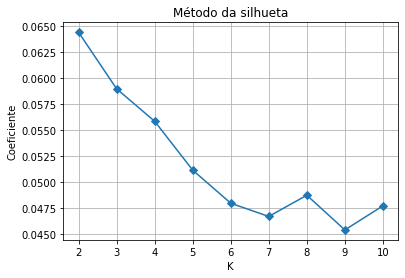

In [175]:
# Plotando o gráfico da silhueta
plt.plot(range(2, 11), silhuetas, marker="D")
plt.grid()
plt.title("Método da silhueta")
plt.xlabel("K")
plt.ylabel("Coeficiente")
plt.show()

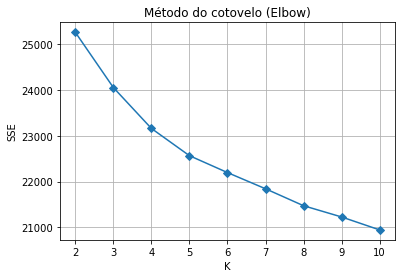

In [176]:
# Plotando o gráfico do cotevelo
plt.plot(range(2, 11), sse_list, marker="D") 
plt.grid()                                   
plt.title("Método do cotovelo (Elbow)")      
plt.xlabel("K")                              
plt.ylabel("SSE")                            
plt.show()      

RESPOSTA: Analisando o metodo de cotovelo não ficou muito claro qual a quantidade de clusters a ser utilizado, porem ao utilizarmos
o modelo do silhueta ficou mais evidente que a quantidade de cluster necessarios seria 4 pois o gráfico da silhueta mostra
um coeficiente com maior valor medianamente enquanto que o erro quadrático médico acumulado do gráfico do cotovelo fica medianamente menor.


In [177]:
#treinando o modelo
k = 4
modelo = KMeans(n_clusters = k)
modelo.fit(X_train_scaled)

KMeans(n_clusters=4)

In [178]:
#adicionando a coluna de grupos ao dataframe
celulares = X_train.copy().reset_index()
celulares['grupo'] = modelo.labels_

In [179]:
celulares[celulares["grupo"] == 0].describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,grupo
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0
mean,964.756233,1167.213296,0.454294,1.507479,0.545706,2.775623,0.576177,33.360111,0.487812,138.011080,4.484765,8.011080,478.864266,1125.085873,2257.124654,16.038781,10.437673,0.473684,0.520776,0.0
std,572.297739,438.192571,0.498598,0.808994,0.498598,2.798226,0.494849,17.686874,0.294611,34.481152,2.194796,5.385669,297.507425,391.978104,1074.523609,2.290959,3.697915,0.500000,0.500262,0.0
min,6.000000,504.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,4.000000,507.000000,258.000000,11.000000,1.000000,0.000000,0.000000,0.0
25%,458.000000,799.000000,0.000000,0.600000,0.000000,0.000000,0.000000,18.000000,0.200000,107.000000,3.000000,4.000000,240.000000,790.000000,1356.000000,14.000000,8.000000,0.000000,0.000000,0.0
50%,953.000000,1131.000000,0.000000,1.500000,1.000000,2.000000,1.000000,33.000000,0.500000,138.000000,5.000000,7.000000,450.000000,1081.000000,2296.000000,17.000000,10.000000,0.000000,1.000000,0.0
75%,1420.000000,1526.000000,1.000000,2.200000,1.000000,5.000000,1.000000,49.000000,0.800000,166.000000,6.000000,11.000000,678.000000,1437.000000,3237.000000,18.000000,13.000000,1.000000,1.000000,0.0
max,1999.000000,1996.000000,1.000000,3.000000,1.000000,13.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1325.000000,1990.000000,3996.000000,19.000000,18.000000,1.000000,1.000000,0.0


In [180]:
celulares[celulares["grupo"] == 1].describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,grupo
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0
mean,1043.895178,1246.675052,0.507338,1.523690,0.555556,2.194969,0.505241,32.283019,0.507966,141.761006,4.511530,7.901468,416.761006,1094.800839,2019.620545,9.301887,3.039832,0.513627,0.425577,1.0
std,573.726300,445.047148,0.500471,0.831777,0.497426,2.195712,0.500497,18.343753,0.285393,35.653289,2.329563,5.065613,272.264040,381.388331,1083.977829,3.302828,2.338140,0.500339,0.494949,0.0
min,0.000000,503.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,259.000000,5.000000,0.000000,0.000000,0.000000,1.0
25%,559.000000,852.000000,0.000000,0.700000,0.000000,0.000000,0.000000,16.000000,0.200000,109.000000,2.000000,3.000000,188.000000,791.000000,1050.000000,7.000000,1.000000,0.000000,0.000000,1.0
50%,1068.000000,1231.000000,1.000000,1.500000,1.000000,2.000000,1.000000,31.000000,0.500000,141.000000,4.000000,8.000000,372.000000,1046.000000,2048.000000,9.000000,3.000000,1.000000,0.000000,1.0
75%,1519.000000,1644.000000,1.000000,2.300000,1.000000,4.000000,1.000000,48.000000,0.700000,173.000000,7.000000,11.000000,599.000000,1361.000000,2953.000000,11.000000,5.000000,1.000000,1.000000,1.0
max,1997.000000,1997.000000,1.000000,3.000000,1.000000,9.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1145.000000,1998.000000,3963.000000,19.000000,10.000000,1.000000,1.000000,1.0


In [181]:
celulares[celulares["grupo"] == 2].describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,grupo
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.0
mean,998.230548,1284.074928,0.469741,1.571182,0.469741,10.279539,0.527378,30.962536,0.483862,142.550432,4.662824,16.628242,576.472622,1202.942363,2176.247839,11.902017,4.504323,0.501441,0.521614,2.0
std,584.546535,445.379503,0.499804,0.810894,0.499804,3.601495,0.499971,18.536210,0.284725,36.178023,2.326991,2.785721,375.698465,417.009290,1071.442972,3.977054,3.490178,0.500720,0.500254,0.0
min,4.000000,501.000000,0.000000,0.500000,0.000000,1.000000,0.000000,2.000000,0.100000,80.000000,1.000000,9.000000,0.000000,508.000000,258.000000,5.000000,0.000000,0.000000,0.000000,2.0
25%,496.500000,899.000000,0.000000,0.800000,0.000000,8.000000,0.000000,14.000000,0.200000,111.000000,3.000000,14.000000,269.000000,847.000000,1272.000000,9.000000,2.000000,0.000000,0.000000,2.0
50%,1002.000000,1331.000000,0.000000,1.500000,0.000000,10.000000,1.000000,32.000000,0.500000,146.000000,5.000000,17.000000,517.000000,1163.000000,2219.000000,12.000000,4.000000,1.000000,1.000000,2.0
75%,1506.000000,1683.500000,1.000000,2.300000,1.000000,13.000000,1.000000,48.000000,0.700000,174.000000,7.000000,19.000000,812.500000,1529.500000,3126.500000,15.000000,7.000000,1.000000,1.000000,2.0
max,1991.000000,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1703.000000,1995.000000,3998.000000,19.000000,16.000000,1.000000,1.000000,2.0


In [182]:
celulares[celulares["grupo"] == 3].describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,grupo
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.0
mean,985.044444,1267.441270,0.536508,1.459683,0.473016,2.653968,0.498413,32.365079,0.539365,139.790476,4.495238,7.742857,1243.971429,1688.031746,2072.012698,12.590476,5.450794,0.523810,0.558730,3.0
std,571.558467,428.924836,0.499459,0.824501,0.500066,2.848221,0.500793,18.023959,0.282346,35.257116,2.334143,5.251682,318.403525,222.720610,1082.493000,3.872231,3.885293,0.500227,0.497329,0.0
min,1.000000,507.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,224.000000,1040.000000,262.000000,5.000000,0.000000,0.000000,0.000000,3.0
25%,528.000000,893.000000,0.000000,0.600000,0.000000,0.000000,0.000000,16.000000,0.300000,109.500000,2.500000,3.000000,1024.500000,1512.500000,1208.500000,9.000000,3.000000,0.000000,0.000000,3.0
50%,963.000000,1266.000000,1.000000,1.400000,0.000000,2.000000,0.000000,32.000000,0.600000,140.000000,4.000000,7.000000,1222.000000,1726.000000,2002.000000,13.000000,5.000000,1.000000,1.000000,3.0
75%,1476.000000,1641.500000,1.000000,2.200000,1.000000,4.000000,1.000000,47.000000,0.800000,169.500000,7.000000,11.000000,1454.000000,1886.500000,2999.500000,16.000000,8.000000,1.000000,1.000000,3.0
max,1996.000000,1995.000000,1.000000,3.000000,1.000000,14.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1996.000000,3970.000000,19.000000,17.000000,1.000000,1.000000,3.0


Analisando visualmente os dados podemos verificar que foram criadas 4 categorias de 0 a 3 aonde a categoria 3 representa os piores celulares, a categoria 1 representa os celulares de nível baixo, a categoria 2 representa os celulares médios e a categoria 4 representa os celulares de maior nível. Podemos chegar a essa conclusão observando as medias de cada categoria em suas respectivas variáveis.

# KNN

In [221]:
#normalizando os dados, os dados são todos numericos e não existe dados nulos.
X= df.drop(columns=["price_range"])
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Separando Treino e Teste

In [222]:
# Nosso dataframe só possui valores numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [248]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [249]:
y_pred = knn.predict(X_test_scaled)

In [250]:
accuracy_score(y_test, y_pred)

0.5666666666666667

In [251]:
matriz_confusao = confusion_matrix(y_test, y_pred, 
                                   labels=[0, 1, 2, 3]) # Cria a matriz de confusão
matriz_confusao

array([[116,  33,   1,   1],
       [ 44,  67,  27,   8],
       [ 10,  48,  69,  21],
       [  0,  13,  54,  88]], dtype=int64)

<AxesSubplot:>

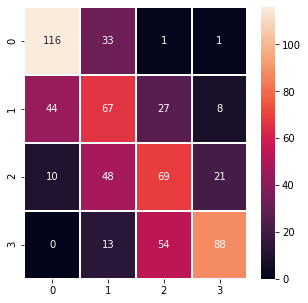

In [252]:
# Visualiza a matriz de confusão 
#   - colunas: price_range PREDITAS
#   - linhas : price_rang REAIS 
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matriz_confusao, linewidths=1, annot=True, ax=ax, fmt='g')

In [253]:

for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)    
    print(accuracy_score(y_test, y_pred), i)
    

0.44166666666666665 2
0.47333333333333333 3
0.4683333333333333 4
0.5083333333333333 5
0.49666666666666665 6
0.5166666666666667 7
0.5466666666666666 8
0.5666666666666667 9
